In [71]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
import matplotlib.ticker as mticker
from netCDF4 import Dataset
import netCDF4
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature
import h5py as h5
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from mpl_toolkits.axes_grid1 import make_axes_locatable
from wrf import getvar, interplevel, to_np, get_basemap, latlon_coords,latlon_coords, smooth2d,get_cartopy, cartopy_xlim, cartopy_ylim,ll_to_xy
import pandas as pd
import csv

In [72]:
ncfile = Dataset('ncf_20170108_022049.nc')

In [73]:
zhh = ncfile['DBZH'][:].squeeze()
height = ncfile['z0']

In [74]:
total_bins = 0
x = 0
z = 0
while z < 21:
    x = 0
    while x < 1001:
        w = np.argwhere((zhh[z,:,x]) >= -30)
        filler = len(w)
        total_bins = total_bins + filler
        filler = 0
        x = x + 1
    z = z + 1
    

In [75]:
print(total_bins)

2847171


In [76]:
low = [-30.5, -29.5,-28.5,-27.5,-26.5,-25.5,-24.5,-23.5,-22.5,-21.5,-20.5,-19.5,-18.5,-17.5,-16.5,-15.5,-14.5,-13.5,-12.5,-11.5,-10.5,-9.5,-8.5,-7.5,-6.5,-5.5,-4.5,-3.5,-2.5,-1.5,-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,15.5,16.5,17.5,18.5,19.5,20.5,21.5,22.5,23.5,24.5,25.5,26.5,27.5,28.5,29.5]
high = [-29.5,-28.5,-27.5,-26.5,-25.5,-24.5,-23.5,-22.5,-21.5,-20.5,-19.5,-18.5,-17.5,-16.5,-15.5,-14.5,-13.5,-12.5,-11.5,-10.5,-9.5,-8.5,-7.5,-6.5,-5.5,-4.5,-3.5,-2.5,-1.5,-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,15.5,16.5,17.5,18.5,19.5,20.5,21.5,22.5,23.5,24.5,25.5,26.5,27.5,28.5,29.5,30.5]
file_name = ['ncf_20170108_022049.nc','ncf_20170108_023048.nc','ncf_20170108_024049.nc','ncf_20170108_025048.nc','ncf_20170108_030049.nc','ncf_20170108_031048.nc','ncf_20170108_032048.nc','ncf_20170108_033048.nc','ncf_20170108_034048.nc','ncf_20170108_035048.nc','ncf_20170108_040048.nc','ncf_20170108_041048.nc','ncf_20170108_042048.nc','ncf_20170108_043048.nc','ncf_20170108_044048.nc','ncf_20170108_045048.nc','ncf_20170108_050048.nc','ncf_20170108_051048.nc','ncf_20170108_052048.nc','ncf_20170108_054048.nc','ncf_20170108_055048.nc']

In [77]:
file_name[0][13:17]

'0220'

ncf_20170108_022049.nc
***Z LEVEL***
0
***Z LEVEL***
1
***Z LEVEL***
2
***Z LEVEL***
3
***Z LEVEL***
4
***Z LEVEL***
5
***Z LEVEL***
6
***Z LEVEL***
7
***Z LEVEL***
8
***Z LEVEL***
9
***Z LEVEL***
10
***Z LEVEL***
11
***Z LEVEL***
12
***Z LEVEL***
13
***Z LEVEL***
14
***Z LEVEL***
15
***Z LEVEL***
16
***Z LEVEL***
17
***Z LEVEL***
18
***Z LEVEL***
19
***Z LEVEL***
20
ncf_20170108_023048.nc
***Z LEVEL***
0
***Z LEVEL***
1
***Z LEVEL***
2
***Z LEVEL***
3
***Z LEVEL***
4
***Z LEVEL***
5
***Z LEVEL***
6
***Z LEVEL***
7
***Z LEVEL***
8
***Z LEVEL***
9
***Z LEVEL***
10
***Z LEVEL***
11
***Z LEVEL***
12
***Z LEVEL***
13
***Z LEVEL***
14
***Z LEVEL***
15
***Z LEVEL***
16
***Z LEVEL***
17
***Z LEVEL***
18
***Z LEVEL***
19
***Z LEVEL***
20
ncf_20170108_024049.nc
***Z LEVEL***
0
***Z LEVEL***
1
***Z LEVEL***
2
***Z LEVEL***
3
***Z LEVEL***
4
***Z LEVEL***
5
***Z LEVEL***
6
***Z LEVEL***
7
***Z LEVEL***
8
***Z LEVEL***
9
***Z LEVEL***
10
***Z LEVEL***
11
***Z LEVEL***
12
***Z LEVEL***
13
***Z LEVE

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


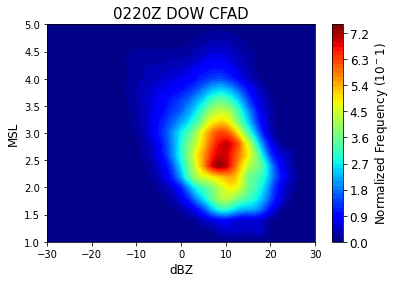

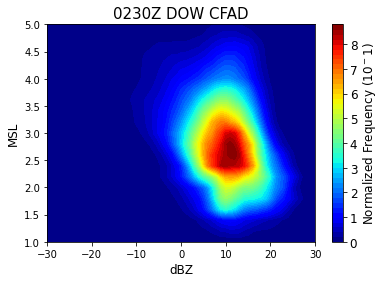

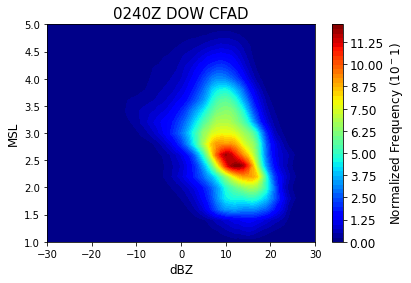

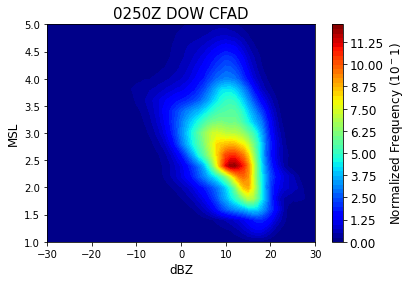

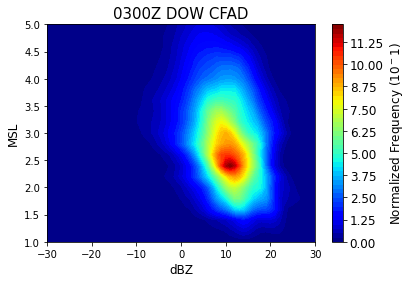

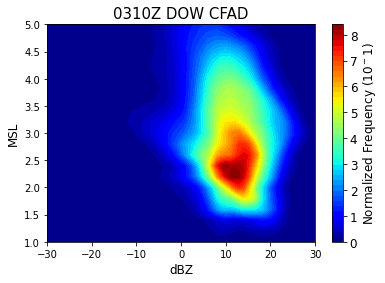

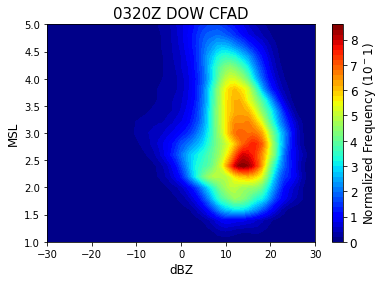

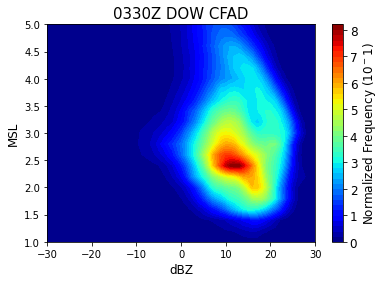

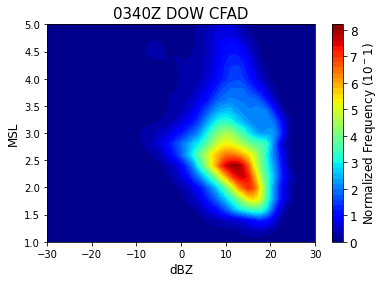

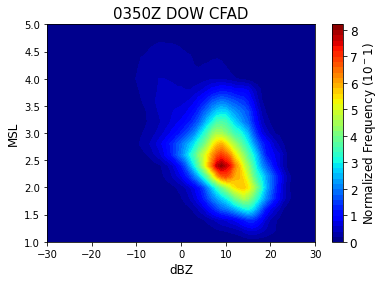

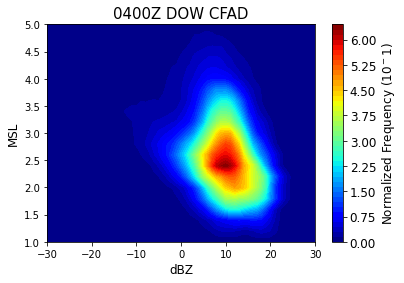

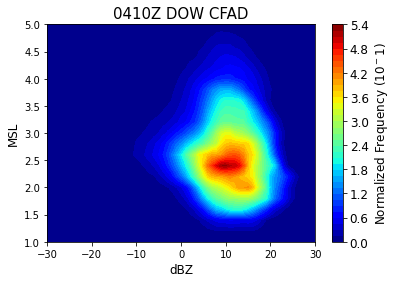

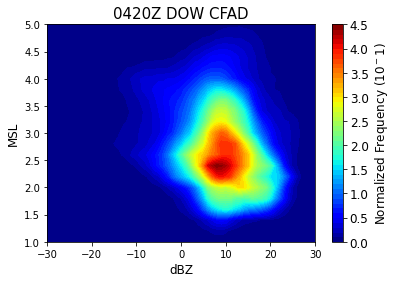

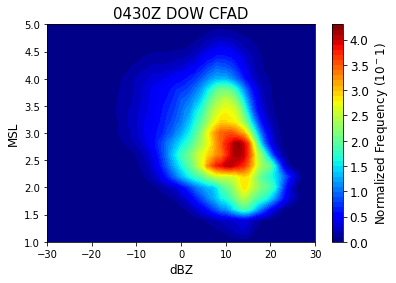

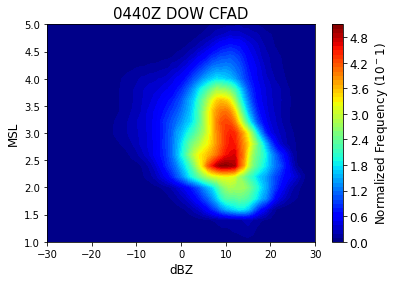

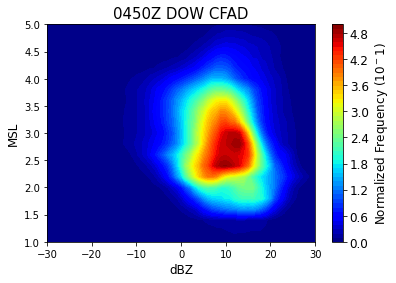

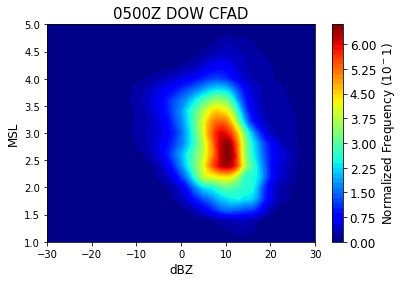

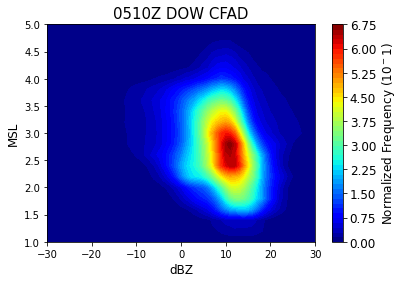

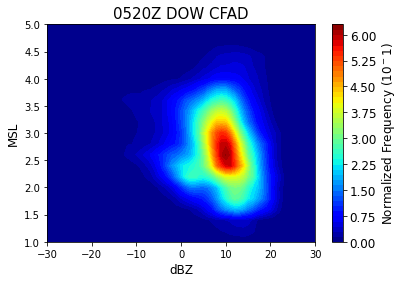

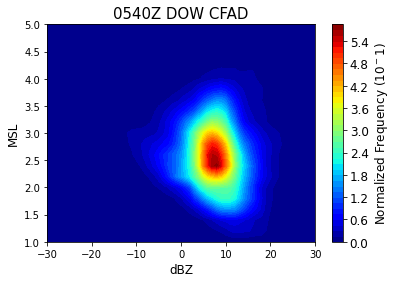

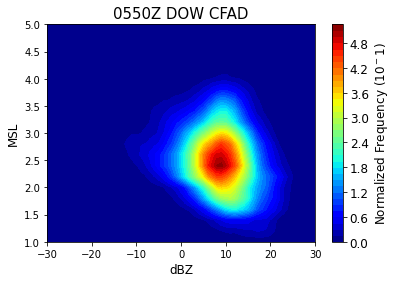

In [79]:
for f in file_name:
    print(f)
    ncfile = Dataset(f)
    titlename = f[13:17] +"Z"+" DOW CFAD"
    picname = f[13:17] +"Z"+"_DOW_CFAD.png"
    zhh = ncfile['DBZH'][:].squeeze()
    #Need to count all of the bins
    x = 0
    y = 0
    z = 0

    #Make the CFAD Array
    CFAD = np.zeros((21, 61))

    tots = 0
    #Looping through each level, there are 21 of them starting from 1.0 km to 5 km
    while z < 21:
        print("***Z LEVEL***")
        print(z)
        cts = 0

        #Looping through each dBZ value
        while cts < len(low):
            filler = 0

            #Finding if in a given x, y plane, if the value is within a lower or upper bound
            w=np.argwhere(((np.array(zhh)[z,:,:] >= low[cts]) & (np.array(zhh)[z,:,:] <= high[cts])))

            filler = filler + w.shape[0]
            tots = tots+w.shape[0]
            x = x + 1

            #Find the percentage of that 
            percentage = filler/total_bins

            #Add it to the CFAD
            CFAD[z,cts] = percentage
            cts = cts + 1
            x = 0


        z = z + 1
    CFAD = CFAD * 1000
    c
    CS = ax.contourf(xs, ys, CFAD,50, cmap = 'jet')
    plt.title(titlename, fontsize = 15)
    plt.xlabel("dBZ", fontsize = 12)
    plt.ylabel("MSL", fontsize = 12)
    cbar = plt.colorbar(CS, ax=ax)
    cbar.ax.tick_params(labelsize=12)
    ax.tick_params(axis='both', which='major', labelsize=10)
    cbar.set_label('Normalized Frequency ($10^-1$)', fontsize = 12)
    plt.savefig(picname,dpi = 400)   

In [34]:
print(total_bins)
print(tots)

2847171
2845170


In [35]:
tes

NameError: name 'tes' is not defined

In [43]:
xs = [-30,-29,-28,-27,-26,-25,-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
ys = [1,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6,4.8,5.0]
xs = np.array(xs)
ys = np.array(ys)

In [47]:
print(CFAD[8,29])
print(xs[29])

2.4111653286718644
-1


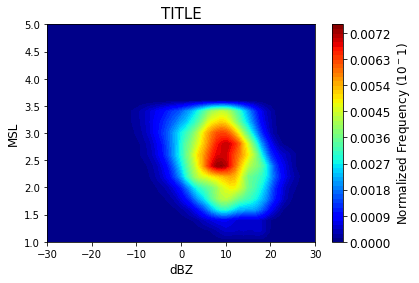

In [55]:

fig, ax = plt.subplots()
CS = ax.contourf(xs, ys, CFAD,50, cmap = 'jet')
plt.title(titlename, fontsize = 15)
plt.xlabel("dBZ", fontsize = 12)
plt.ylabel("MSL", fontsize = 12)
cbar = plt.colorbar(CS, ax=ax)
cbar.ax.tick_params(labelsize=12)
ax.tick_params(axis='both', which='major', labelsize=10)
cbar.set_label('Normalized Frequency ($10^-1$)', fontsize = 12)
plt.savefig(picname,dpi = 400)